In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("synthetic_stock_data.csv")

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.drop(columns=['Date'], inplace=True)

In [ ]:
display(df.head())

,Stock Price,Interest Rate (%),Inflation Rate (%),GDP Growth Rate (%),Market Index
0,31854.31,4.97,3.87,6.50,36089.94
1,57782.14,5.37,3.66,8.23,18088.90
2,47939.73,7.27,2.88,6.94,23439.11
3,41939.63,4.70,5.04,3.58,33888.26
4,22020.84,7.35,4.38,4.30,27908.95


In [ ]:
display(df.isnull().sum())

Stock Price            0
Interest Rate (%)      0
Inflation Rate (%)     0
GDP Growth Rate (%)    0
Market Index           0
dtype: int64

In [ ]:
X = df.drop(columns=["Stock Price"])
y = df["Stock Price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 11236.482516711838
Mean Squared Error (MSE): 168701515.71280214
Root Mean Squared Error (RMSE): 12988.514761619288
R-squared (R2): -0.004752677123359694


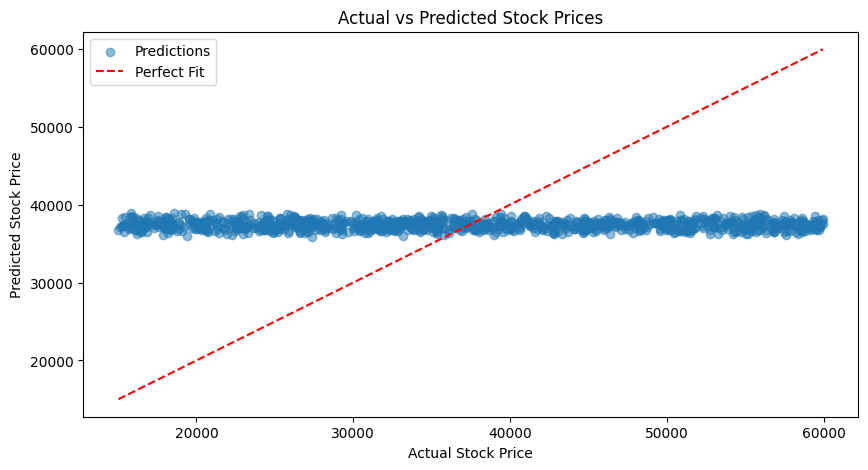

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

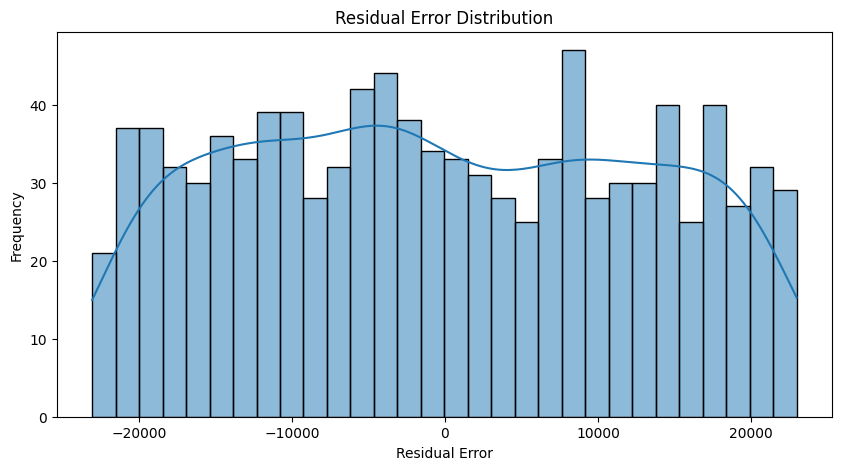

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Residual Error Distribution")
plt.show()


In [3]:
df = pd.read_csv("synthetic_economic_data.csv")

In [4]:
np.random.seed(42)

data = {
    "Interest Rate (%)": np.random.uniform(2, 10, 100),
    "Inflation Rate (%)": np.random.uniform(1, 12, 100),
    "GDP Growth Rate (%)": np.random.uniform(-2, 8, 100)
}

df = pd.DataFrame(data)

In [5]:
def calculate_market_index(row):
    return 100 + (-1.5 * row["Interest Rate (%)"]) + (-1.2 * row["Inflation Rate (%)"]) + (2.0 * row["GDP Growth Rate (%)"])

df["Market Index"] = df.apply(calculate_market_index, axis=1)

In [6]:
print("Sample Data:")
display(df.head())

Sample Data:


,Interest Rate (%),Inflation Rate (%),GDP Growth Rate (%),Market Index
0,4.996321,1.345721,4.420316,99.731286
1,9.605714,8.000515,-1.158600,73.673610
2,7.855952,4.457916,-0.383713,82.099148
3,6.789268,6.594278,6.985542,95.874049
4,3.248149,10.983231,4.064291,90.076480


In [7]:
correlation_matrix = df.corr()

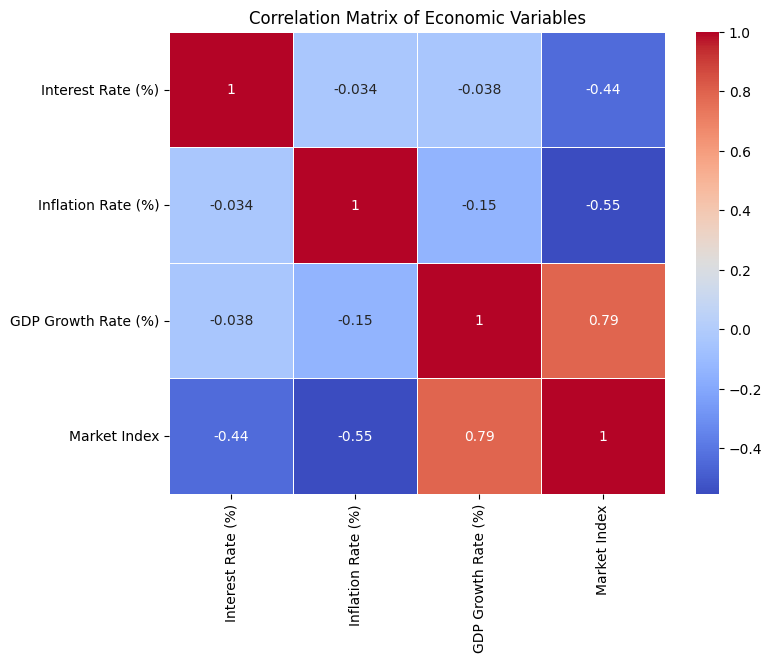

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Economic Variables")
plt.show()
